# <span style="color:#F72585"><center>UMAP: Uniform Manifold Approximation and Projection</center></span>



<figure>
<center>
<img src="../Imagenes/umap.png" width="700" height="400" align="center" /> 
</center>   
</figure>

Fuente: Leland McInnes, John Healy, [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426.pdf)

## <span style="color:#4361EE">Referencias</span>

1. Leland McInnes, John Healy, [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426.pdf)
2. Read The Docs, [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/)
3. Dimo Angelov, Top2Vec: Distributed Representations of Topics [Arxiv, 19 de Agosto de 2020](https://arxiv.org/abs/2008.09470)
4. Dimo Angelov, Top2Vec, [Github](https://github.com/ddangelov/Top2Vec)

## <span style="color:#4361EE">Introducción</span>

La aproximación y proyección de variedad uniforme (UMAP) es una técnica de reducción de dimensión que se puede utilizar para la visualización de forma similar a t-SNE, pero también para la reducción de dimensión no-lineal general. El algoritmo se basa en tres supuestos sobre los datos.

1. Los datos se distribuyen uniformemente en una variedad de Riemann;

2. La métrica de Riemann es localmente constante (o puede aproximarse como tal);

3. La variedad está conectado localmente.

A partir de estos supuestos es posible modelar la variedad con una estructura topológica difusa. La incrustación se encuentra buscando una proyección de baja dimensión de los datos que tenga la estructura topológica difusa equivalente más cercana posible.

## <span style="color:#4361EE">Algoritmo</span>

El algoritmo UMAP es realmente una unión de varias ramas de la matemática: Topología Algebraica, Geometría Riemaniana, Análsis Toplógico de Datos, el Teorema de Nerve, y Lógica Difusa.

Sin embargo, se puede resumir en los siguientes pasos:

1. La primera fase consiste en construir una representación topológica difusa. 

2. La segunda fase es simplemente optimizar la representación de baja dimensión para tener una representación topológica difusa lo más cercana posible medida por entropía cruzada.

Al construir la representación topológica difusa inicial, podemos tomar algunos atajos. En la práctica, dado que las fuerzas de pertenencia de los conjuntos borrosos decaen hasta ser extremadamente pequeñas, solo necesitamos calcularlas para los vecinos más cercanos de cada punto. En última instancia, eso significa que necesitamos una forma de calcular rápidamente (aproximar) los vecinos más cercanos de manera eficiente, incluso en espacios de gran dimensión. Podemos hacer esto aprovechando el algoritmo de descenso del vecino más cercano de Dong et al. Los cálculos restantes ahora solo se ocupan de los vecinos locales de cada punto y, por lo tanto, son muy eficientes.

Al optimizar la incrustación de baja dimensión, nuevamente podemos tomar algunos atajos. Podemos utilizar el descenso de gradiente estocástico para el proceso de optimización. Para facilitar el problema del descenso del gradiente, es beneficioso que la función objetivo final sea diferenciable. Podemos arreglar eso usando una aproximación suave de la función de fuerza de membresía real para la representación de baja dimensión, seleccionando de una familia convenientemente versátil. En la práctica UMAP utiliza la familia de curvas de la forma $\frac{1}{1+ax^{2b}}$.
 
Del mismo modo, no queremos tener que lidiar con todos los bordes posibles, por lo que podemos usar el truco de muestreo negativo (como lo usan word2vec y LargeVis), para simplemente muestrear ejemplos negativos según sea necesario. Finalmente, dado que el laplaciano de la representación topológica es una aproximación del operador de la variedad de Laplace-Beltrami, podemos usar técnicas de incrustación espectral para inicializar la representación de baja dimensión en un buen estado.

Al juntar todas estas piezas, llegamos a un algoritmo que es rápido y escalable, pero que aún se basa en una teoría matemática sólida. Esperemos que esta introducción haya ayudado a proporcionar algo de intuición sobre esa teoría subyacente y sobre cómo funciona el algoritmo UMAP en la práctica.

## <span style="color:#4361EE">Cómo usar UMAP</span>

In [2]:
!conda install -c conda-forge umap-learn -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - pypi/pypi::ipympl==0.9.2=pypi_0
done

## Package Plan ##

  environment location: /Users/moury/miniforge3/envs/s_3579_cod

  added / updated specs:
    - umap-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libllvm11-11.1.0           |       hfa12f05_4        20.6 MB  conda-forge
    llvmlite-0.39.1            |   py39h8ca5d33_0         260 KB  conda-forge
    numba-0.56.3               |   py39h251cc7c_0         4.0 MB  conda-forge
    pynndescent-0.5.8          |     pyh1a96a4e_0          47 KB  conda-forge
    tbb-2021.6.0               |       hffc8910_1         134 KB  conda-forge
    umap-learn-0.5.3           |   py39h2804cbe_0         132 KB  conda-forge
    ------------------------------------------------------------


In [5]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Utilizaremos un conjunto de datos de medidas de pingüinos para ver el poder de UMAP.

El dataset consiste en medidas del pico (culmen) y aletas y pesos de tres especies de pingüinos, junto con algunos otros metadatos sobre los pingüinos.

In [4]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

Limpiemos los datos y vemoas algo de información:

In [6]:
penguins = penguins.dropna()
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Visualizar estos datos es un poco complicado ya que no podemos trazar en 4 dimensiones fácilmente. Afortunadamente, cuatro no es un número tan grande, por lo que podemos usar una matriz de diagrama de dispersión de características por pares para tener una idea de lo que está sucediendo. Seaborn lo hace fácil.

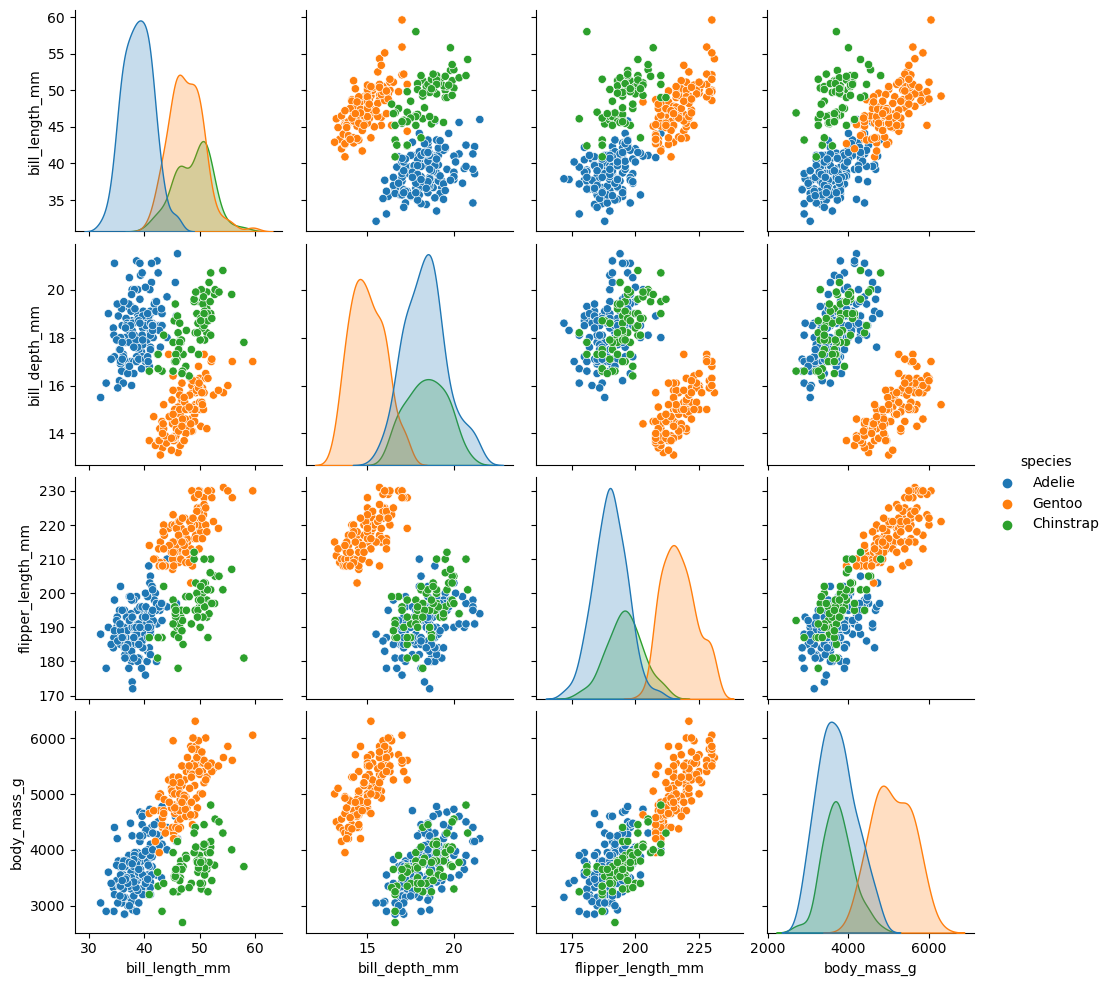

In [7]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

## <span style="color:#4361EE">Usando UMAP</span>

In [8]:
import umap

reducer = umap.UMAP()

Antes de que podamos hacer cualquier trabajo con los datos, ayudará limpiarlos un poco. No necesitaremos NA, solo queremos las columnas de medición, y dado que las mediciones están en escalas completamente diferentes, será útil convertir cada característica en puntajes z (número de desviaciones estándar de la media) para comparar.

In [9]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
 
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [10]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(333, 2)

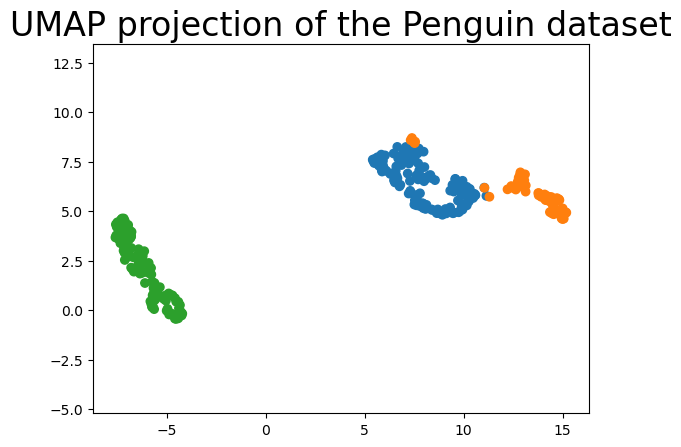

In [11]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

## <span style="color:#4361EE">Conjuntos más avanzados</span>

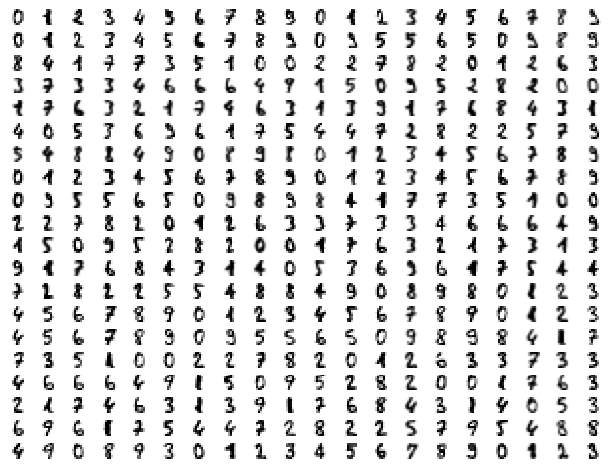

In [12]:
digits = load_digits()

fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [14]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(digits.data)
embedding.shape

(1797, 2)

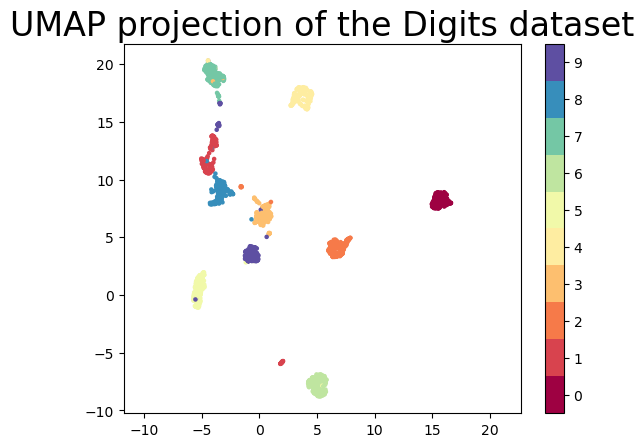

In [15]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

## <span style="color:#4361EE">Parámetros básicos de UMAP</span>

UMAP es un algoritmo de reducción de dimensión no lineal bastante flexible.

Busca aprender la estructura múltiple de sus datos y encontrar una incrustación de baja dimensión que conserve la estructura topológica esencial de esa variedad. 

En este cuaderno, generaremos algunos datos tridimensionales visualizables, demostraremos cómo usar UMAP para proporcionar una representación bidimensional y luego veremos cómo varios parámetros de UMAP pueden afectar la incrustación resultante. Esta documentación se basa en el trabajo de Philippe Rivière para visionscarto.net.

CPU times: user 2.64 s, sys: 683 ms, total: 3.32 s
Wall time: 1.08 s


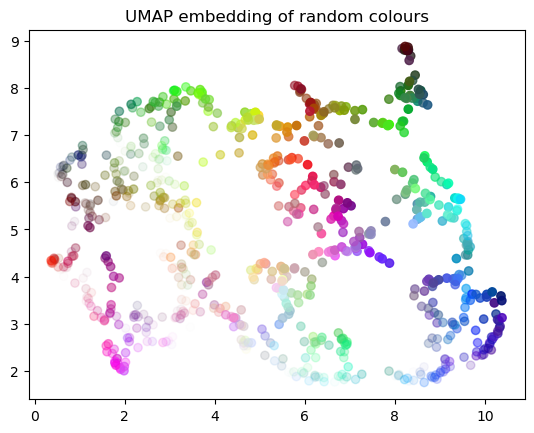

In [16]:
np.random.seed(42)
data = np.random.rand(800, 4)

fit = umap.UMAP()
%time u = fit.fit_transform(data)

plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours');

Como puede ver, el resultado es que los datos se colocan en un espacio de 2 dimensiones, de modo que los puntos que estaban cerca en un espacio de 4 dimensiones (es decir, son de colores similares) se mantienen juntos. Dado que dibujamos una selección aleatoria de puntos en el cubo de color, hay una cierta cantidad de estructura inducida desde donde los puntos aleatorios se agruparon en el espacio de color.

UMAP tiene varios hiperparámetros que pueden tener un impacto significativo en la incrustación resultante. En este cuaderno cubriremos los cuatro principales:

```n_neighbors```

```min_dist```

```n_components```

```metric```

Para hacer la exploración simple, hagamos una función que nos permita hacer experimentos con mayor rapidez:

In [18]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

## <span style="color:#4361EE">n_neighbors</span>

Este parámetro controla cómo UMAP equilibra la estructura local frente a la global en los datos. Lo hace restringiendo el tamaño del vecindario local que UMAP observará cuando intente aprender la estructura múltiple de los datos. Esto significa que los **valores bajos de n_neighbors** obligarán a UMAP a **concentrarse en una estructura muy local** (potencialmente en detrimento del panorama general), mientras que los valores grandes empujarán a UMAP a observar vecindarios más grandes de cada punto al estimar la estructura múltiple de los datos. perder la estructura de detalles finos en aras de obtener la información más amplia.

Podemos ver eso en la práctica ajustando nuestro conjunto de datos con UMAP usando un rango de valores de n_neighbors. El valor predeterminado de n_neighbors para UMAP (como se usó anteriormente) es 15, pero veremos valores que van desde 2 (una vista muy local de la variedad) hasta 200 (una cuarta parte de los datos).

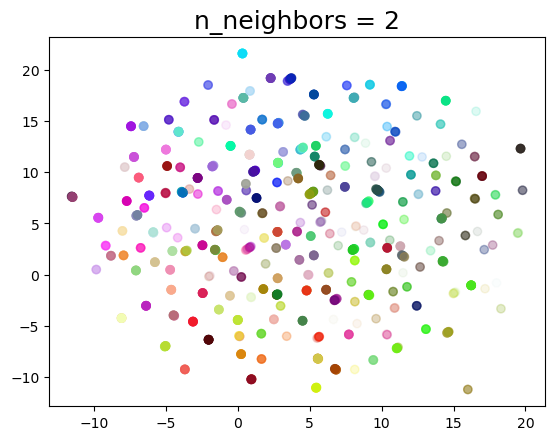

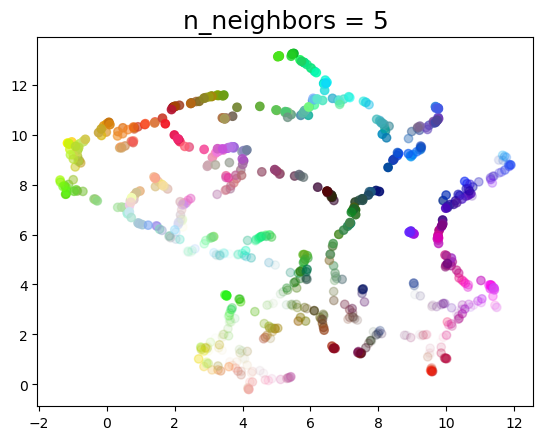

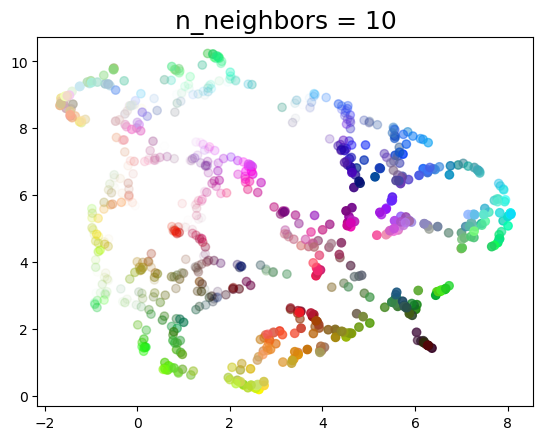

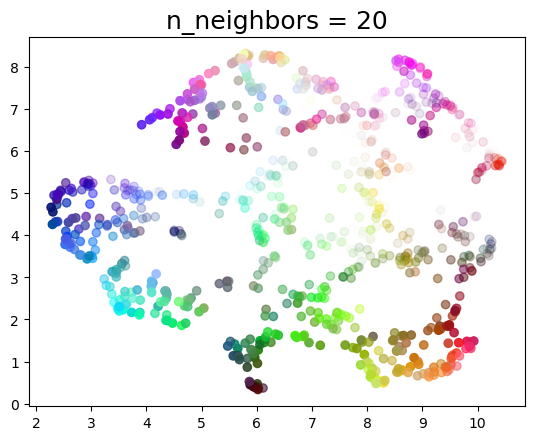

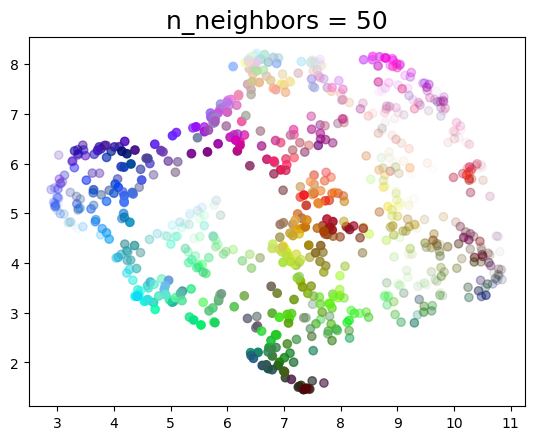

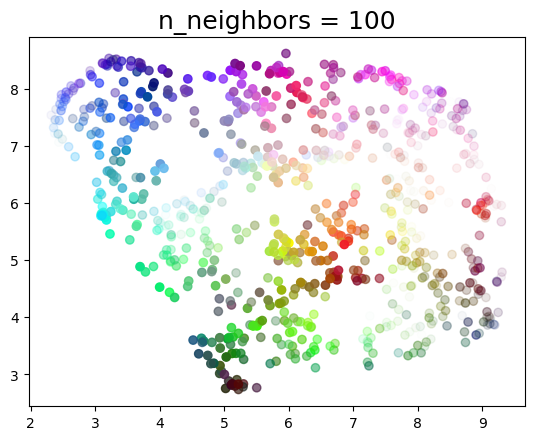

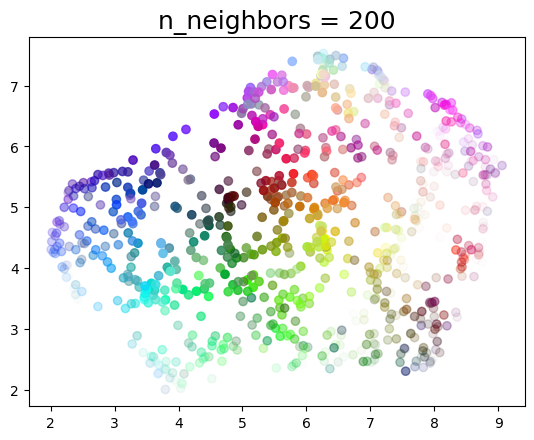

In [19]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

## <span style="color:#4361EE">min_dist</span>

El parámetro min_dist controla qué tan estrechamente se permite que UMAP empaquete puntos juntos. Literalmente, proporciona la distancia mínima que se permite que los puntos estén en la representación de baja dimensión. Esto significa que los **valores bajos de min_dist** darán como resultado **incrustaciones más agrupadas**.

Esto puede ser útil si está interesado en la agrupación en clústeres o en una estructura topológica más fina. Los valores más grandes de min_dist evitarán que UMAP empaquete puntos juntos y, en su lugar, se centrarán en la preservación de la estructura topológica amplia.

El valor predeterminado para min_dist (como se usa arriba) es 0.1. Veremos un rango de valores desde 0.0 hasta 0.99.

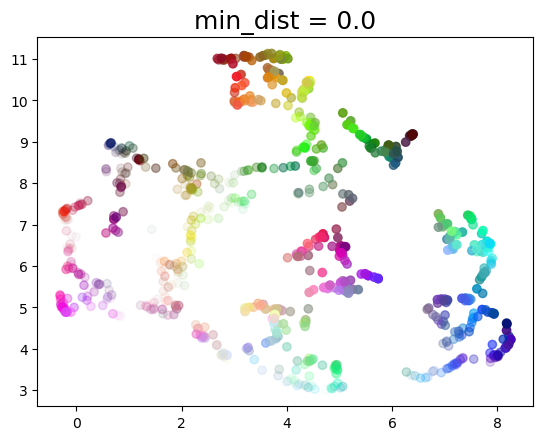

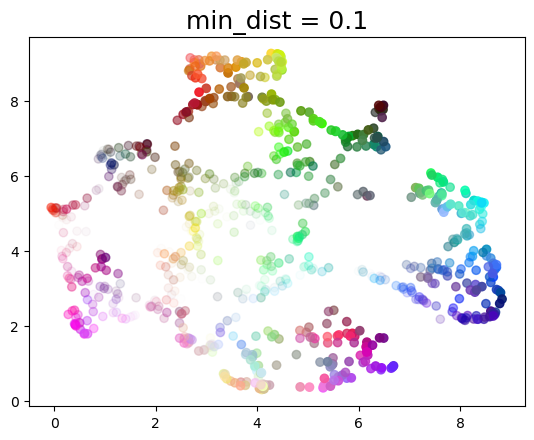

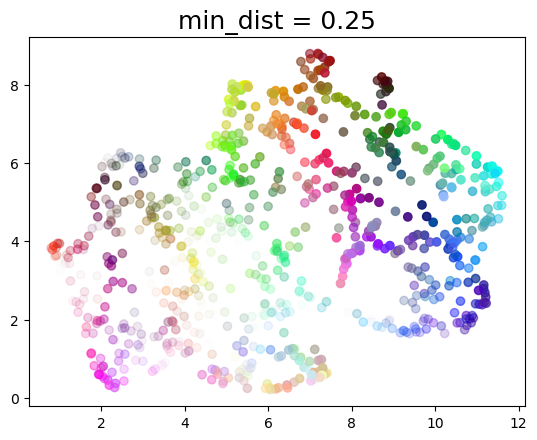

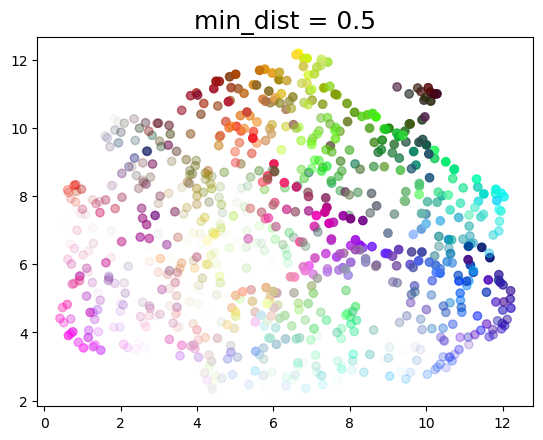

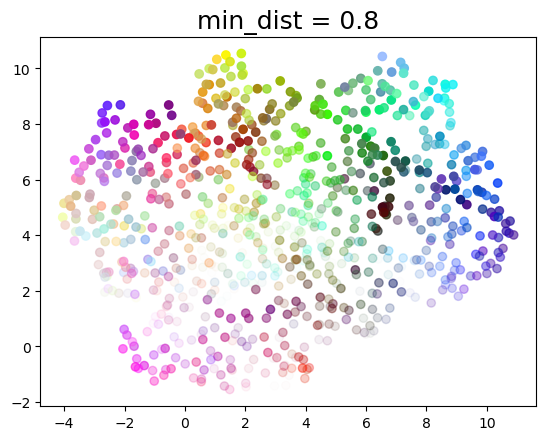

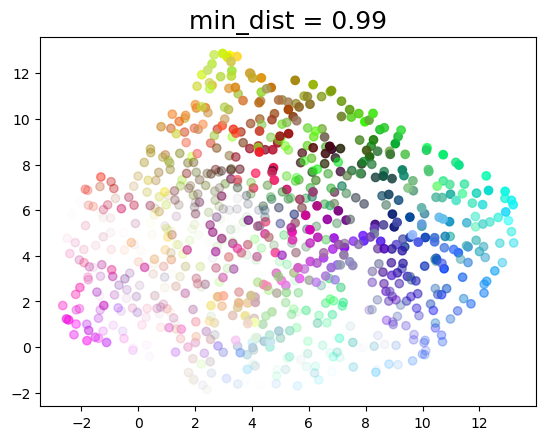

In [20]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

Aquí vemos que con min_dist=0.0, UMAP logra encontrar pequeños componentes conectados, grupos y cadenas en los datos, y enfatiza estas características en la incrustación resultante. A medida que aumenta min_dist, estas estructuras se separan en características más generales más suaves, lo que proporciona una mejor vista general de los datos a pesar de la pérdida de la estructura topológica más detallada.

## <span style="color:#4361EE">n_components</span>

Como es estándar para muchos algoritmos de reducción de dimensión de scikit-learn, UMAP proporciona una opción de parámetro n_components que permite al usuario determinar la dimensionalidad del espacio de dimensión reducida en el que se incorporarán los datos. A diferencia de otros algoritmos de visualización como t-SNE, UMAP escala bien en la dimensión de incrustación, por lo que puede usarlo para algo más que visualización en 2 o 3 dimensiones.

A los efectos de esta demostración (para que podamos ver los efectos del parámetro), solo veremos incrustaciones unidimensionales y tridimensionales, que tenemos alguna esperanza de visualizar.

En primer lugar, estableceremos n_components en 1, lo que obligará a UMAP a incrustar los datos en una línea. Para fines de visualización, distribuiremos aleatoriamente los datos en el eje y para proporcionar cierta separación entre los puntos.

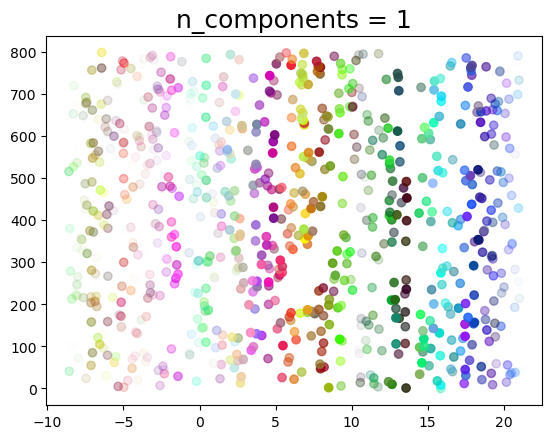

In [21]:
draw_umap(n_components=1, title='n_components = 1')

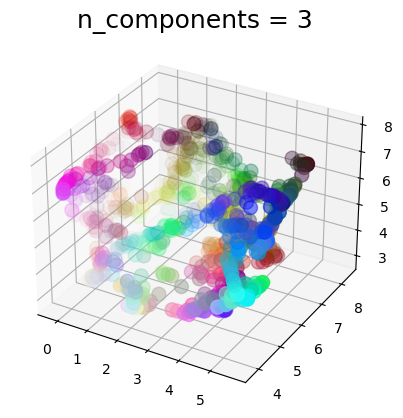

In [22]:
draw_umap(n_components=3, title='n_components = 3')

Aquí podemos ver que con más dimensiones en las que trabajar, UMAP tiene más facilidad para separar los colores de una manera que respeta la estructura topológica de los datos.

Como se mencionó, realmente no hay ningún requisito para detenerse en n_components=3. Si está interesado en la agrupación en clústeres (basada en la densidad) u otras técnicas de aprendizaje automático, puede ser beneficioso elegir una dimensión de incrustación más grande (por ejemplo, 10 o 50) más cercana a la dimensión de la variedad subyacente en la que se encuentran sus datos.

## <span style="color:#4361EE">metric</span>

El último parámetro UMAP que consideraremos en este cuaderno es el parámetro métrico. Esto controla cómo se calcula la distancia en el espacio ambiental de los datos de entrada. De forma predeterminada, UMAP admite una amplia variedad de métricas, que incluyen:

Métricas de estilo Minkowski

euclidiana

manhattan

chebyshev

minkowski

Métricas espaciales misceláneas

Canberra

braycurtis

haversine

Métricas espaciales normalizadas

mahalanobis

wminkowski

seuclidiano

Métricas angulares y de correlación

coseno

correlación

Métricas para datos binarios

hamming

Jaccard

dice

russellrao

kulsinski

rogerstanimoto

sokalmichener

sokalsneath

yule

Cualquiera de los cuales se puede especificar configurando ```metric='<nombre de la métrica>'```; por ejemplo, para usar la distancia del coseno como la métrica, usaría ```metric='cosine'```.

Sin embargo, UMAP ofrece más que esto: admite métricas personalizadas definidas por el usuario, siempre que numba pueda compilar esas métricas en modo nopython. Para este cuaderno, analizaremos dichas métricas personalizadas. Para definir tales métricas necesitaremos numba...

In [23]:
import numba

In [24]:
@numba.njit()
def red_channel_dist(a,b):
    return np.abs(a[0] - b[0])

In [25]:
@numba.njit()
def hue(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if cmax == r:
        return ((g - b) / delta) % 6
    elif cmax == g:
        return ((b - r) / delta) + 2
    else:
        return ((r - g) / delta) + 4

@numba.njit()
def lightness(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    return (cmax + cmin) / 2.0

@numba.njit()
def saturation(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    chroma = cmax - cmin
    light = lightness(r, g, b)
    if light == 1:
        return 0
    else:
        return chroma / (1 - abs(2*light - 1))

In [26]:
@numba.njit()
def hue_dist(a, b):
    diff = (hue(a[0], a[1], a[2]) - hue(b[0], b[1], b[2])) % 6
    if diff < 0:
        return diff + 6
    else:
        return diff

@numba.njit()
def sl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2

@numba.njit()
def hsl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    a_hue = hue(a[0], a[1], a[2])
    b_hue = hue(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2 + (((a_hue - b_hue) % 6) / 6.0)

/Users/moury/miniforge3/envs/s_3579_cod/lib/python3.9/site-packages/umap/umap_.py:1772: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/Users/moury/miniforge3/envs/s_3579_cod/lib/python3.9/site-packages/umap/umap_.py:1772: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/Users/moury/miniforge3/envs/s_3579_cod/lib/python3.9/site-packages/umap/umap_.py:1772: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/Users/mou

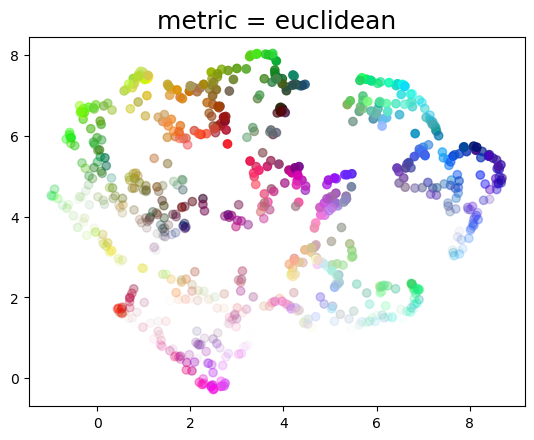

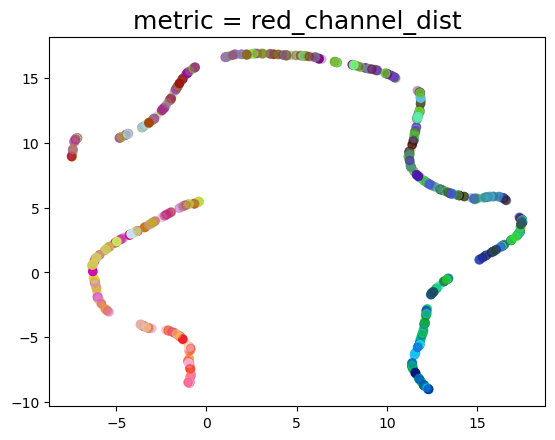

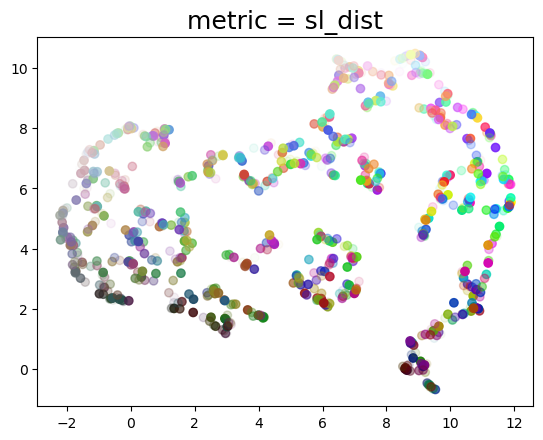

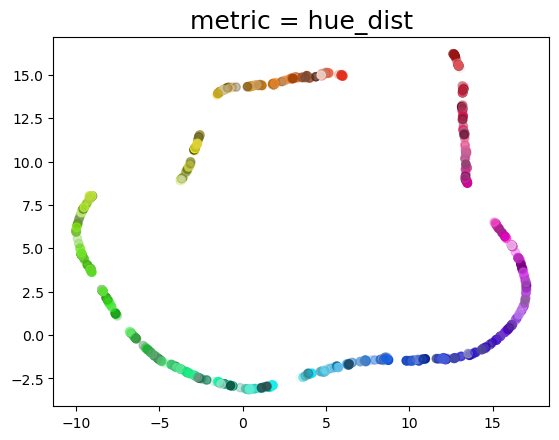

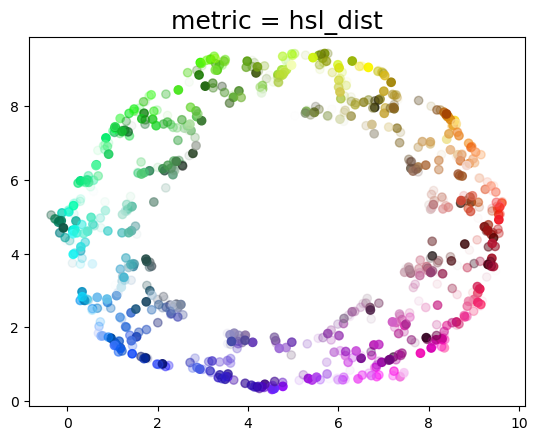

In [27]:
for m in ("euclidean", red_channel_dist, sl_dist, hue_dist, hsl_dist):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(name))

Y aquí podemos ver claramente los efectos de las métricas. El canal rojo puro ve correctamente los datos como viviendo en una variedad unidimensional, la métrica de tono interpreta los datos como viviendo en un círculo, y la métrica HSL engorda el círculo de acuerdo con la saturación y la luminosidad. Esto proporciona una demostración razonable del poder y la flexibilidad de UMAP para comprender la topología subyacente de los datos y encontrar una representación adecuada de baja dimensión de esa topología.

## <span style="color:#4361EE">Transformada Inversa</span>

Uno de la superioridad de éste método de reducción respecto a otros métodos no lineales, es la capacidad de devolvernos para ver los datos en la dimensión original.

UMAP tiene cierto soporte para transformadas inversas: generar una muestra de datos de alta dimensión dada una ubicación en el espacio de incrustación de baja dimensión.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import sklearn.datasets
import umap
import umap.plot

In [30]:
data, labels = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [55]:
# Reproducibilidad
mapper = umap.UMAP(random_state=42).fit(data)

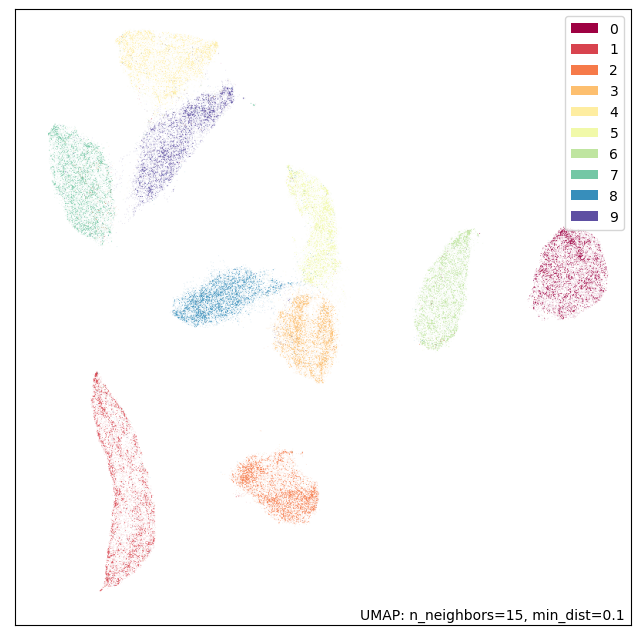

In [56]:
umap.plot.points(mapper, labels=labels);

In [57]:
corners = np.array([
    [-5, -10],  # 1
    [-7, 6],  # 7
    [2, -8],  # 2
    [12, 4],  # 0
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])

Ahora podemos aplicar el método de transformación inversa a este conjunto de puntos de prueba. Cada punto de prueba es un punto bidimensional que se encuentra en algún lugar del espacio de incrustación. El método inverse_transform convertirá esto en una aproximación de la representación de alta dimensión que se habría incrustado en dicha ubicación. Siguiendo la API de sklearn, esto es tan simple de usar como llamar al método inverse_transform del modelo entrenado y pasarle el conjunto de puntos de prueba que queremos convertir en representaciones de alta dimensión. Tenga en cuenta que esto puede ser bastante costoso computacionalmente.

In [58]:
inv_transformed_points = mapper.inverse_transform(test_pts)

Ahora el objetivo es visualizar qué tan bien lo hemos hecho. Efectivamente, lo que nos gustaría hacer es mostrar los puntos de prueba en el espacio de incrustación y luego mostrar una cuadrícula de las imágenes correspondientes generadas por la transformada inversa. Obtener todo esto en una sola figura de matplotlib requiere un poco de configuración, pero es bastante manejable; en su mayoría, solo se trata de administrar el formato de GridSpec. Una vez que tengamos esa configuración, solo necesitamos un diagrama de dispersión de la incrustación, un diagrama de dispersión de los puntos de prueba y, finalmente, una cuadrícula de las imágenes que generamos (convertir los vectores transformados inversos en imágenes es solo cuestión de remodelarlos de nuevo a 28 por 28 cuadrículas de píxeles y usando imshow).

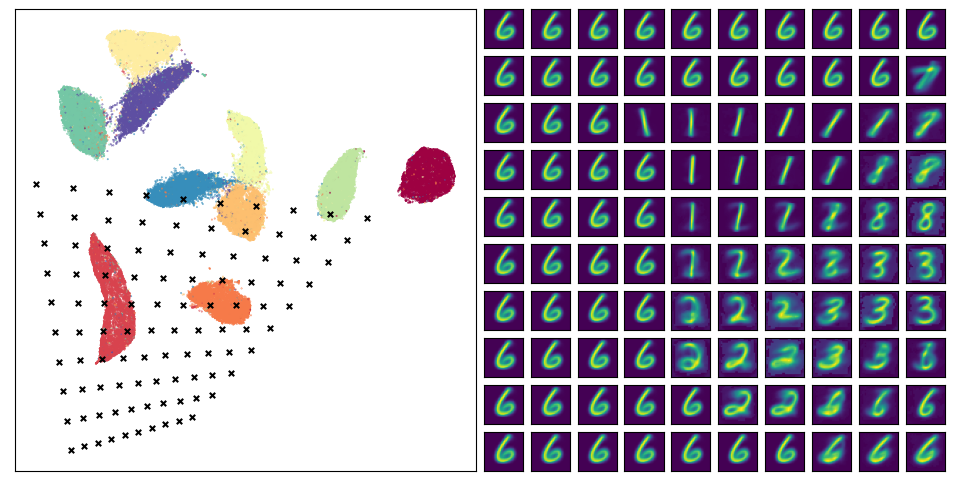

In [60]:
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
scatter_ax.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1],
                   c=labels.astype(np.int32), cmap='Spectral', s=0.1)
scatter_ax.set(xticks=[], yticks=[])

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
for i in range(10):
    for j in range(10):
        digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28))
        digit_axes[i, j].set(xticks=[], yticks=[])

El resultado final se ve bastante bien: de hecho, generamos imágenes de dígitos de aspecto plausible, y muchas de las transiciones (del 1 al 7 en la fila superior, por ejemplo) parecen bastante naturales y tienen sentido. Esto puede ayudarlo a comprender la estructura del grupo de 1 (transiciones en el ángulo, con una pendiente hacia lo que eventualmente serán 7) y por qué los 7 y los 9 están juntos en la incrustación. Por supuesto, también hay algunas transiciones extrañas, especialmente cuando los puntos de prueba caen en grandes espacios entre los grupos en la incrustación; en cierto sentido, es difícil interpretar lo que debería ir en algunos de esos espacios, ya que en realidad no representan nada parecido a un transición suave).

Una nota adicional: Ninguno de los puntos de prueba elegidos cae fuera del casco convexo de la incrustación. Esto es deliberado: la función de transformación inversa funciona mal fuera de los límites de ese casco convexo. Tenga en cuenta que si selecciona puntos para la transformación inversa que están fuera de los límites de la incrustación, es probable que obtenga resultados extraños (a menudo, simplemente se ajusta a un vector de alta dimensión de origen en particular).

### <span style="color:red">**Tarea**</span>

- Haga una implementación de UMAP para MNIST Fashion.

- Averigüe cómo detectar datos atípicos usando UMAP y haga un ejemplo con los datos de sus proyecto.

- Busque cómo utilizar múltiples modelos de UMAP sobre el mismo conjunto de datos. ¿Para qué sirve hacer esto?

- Use UMAP para un ejercicio de clasificación.